In [1]:
%matplotlib inline

In [2]:
import os
import shutil

In [3]:
from matplotlib import pyplot as plt

In [4]:
import fipy as fp

In [5]:
def parameters2columns(parameters):
    import yaml
    
    d_orig = yaml.load(parameters['content'])
    d = dict()
    for k, v in d_orig.iteritems():
        d["--" + k] = v
    return pd.Series(d)

In [25]:
import pandas as pd
from sumatra.projects import load_project

project = load_project('.')
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [26]:
df['nproc'] = df.launch_mode.apply(lambda x: x['parameters']['n'])

In [27]:
df[['label', 'reason', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart', 'reason', 'outcome']]

,label,reason,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart,reason,outcome
0,106f1ffc19bd,,2019-10-11 20:47:52,3.513146,1,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None,,
1,c5ebb4c80fe0,,2019-10-13 10:58:00,9.546216,1,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None,,
2,31058b7cf06d,,2019-10-15 11:26:36,25.609991,1,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None,,
3,3544804c18a0,,2019-10-15 16:27:27,1186.884687,32,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None,,
4,b8eb47b62e4e,,2019-10-15 16:52:27,429.619996,4,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None,,
5,e97d9c91f2b4,,2019-10-15 17:04:05,17921.533205,64,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None,,
6,ad50b5b0effd,,2019-10-16 09:08:31,1.390398,16,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None,,
7,c49ca18b1de2,,2019-10-16 09:08:31,1.373949,16,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None,,
8,aed02552f12a,,2019-10-16 09:08:31,1.189000,16,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None,,
9,68d4de7ceac7,,2019-10-16 11:51:07,40.346007,16,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None,,


In [6]:
df.columns

Index([            u'datastore',          u'dependencies',
                        u'diff',              u'duration',
                  u'executable',            u'input_data',
             u'input_datastore',                 u'label',
                 u'launch_mode',             u'main_file',
                     u'outcome',           u'output_data',
                  u'parameters',             u'platforms',
                      u'reason',               u'repeats',
                  u'repository',      u'script_arguments',
               u'stdout_stderr',                  u'tags',
                   u'timestamp',                  u'user',
                     u'version',                  u'--Lx',
                        u'--Ly',          u'--checkpoint',
                        u'--dt',                  u'--dx',
                    u'--factor',             u'--restart',
                  u'--savetime',       u'--sumatra_label',
                 u'--totaltime', u'--checkpoint_interval

## Clean out debugging runs

In [8]:
df[df['tags'].map(lambda x: '_initialized_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart


In [9]:
def delete_smt_record(label):
    project.delete_record(label, delete_data=True)
    shutil.rmtree(os.path.join("Data", label))

In [10]:
    
df[df['tags'].map(lambda x: '_initialized_' in x)].label.apply(delete_smt_record)

Series([], Name: label, dtype: object)

In [11]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [12]:
df[df['tags'].map(lambda x: '_running_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
22,31e46d8ab732,2019-10-16 22:51:36,NaN,[_running_],abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,1000.0,1000.0,0.8,0.04,1.1,None


In [20]:
delete_smt_record("e0c72c426b3e")

OSError: [Errno 39] Directory not empty: 'Data/e0c72c426b3e'

In [22]:
shutil.rmtree(os.path.join("Data", "e0c72c426b3e"))

In [26]:
delete_smt_record("7aeb901c4209")

In [27]:
delete_smt_record("ec8146cf7385")

In [28]:
delete_smt_record("beb034f2217c")

In [29]:
delete_smt_record("b8d0044ef16f")

In [13]:
delete_smt_record("31e46d8ab732")

In [15]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [16]:
delete_smt_record("135ad521487c")

### other stuff

In [83]:
df[df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
29,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN
30,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN


In [69]:
print df.loc[df['label'] == '9fe80a61913f'].iloc[0]['stdout_stderr']

Not yet captured.


In [39]:
phi, = fp.tools.dump.read("Data/e97d9c91f2b4/t=80.0.tar.gz")

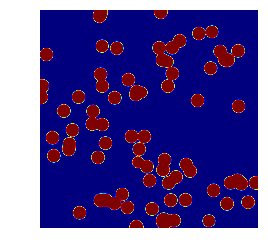

In [66]:
im = plt.imshow(d, cmap='jet', norm=None, aspect=None, interpolation=None,
   alpha=None, vmin=0., vmax=1., origin=None, extent=None)
im.axes.axis('off')
im.write_png("Data/e97d9c91f2b4/t=80.0.png")

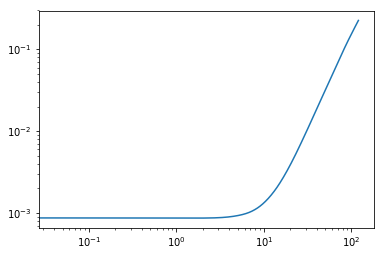

In [137]:
tt, fraction, energy = fp.numerix.loadtxt("Data/e97d9c91f2b4/stats.txt".format(uuid), unpack=True)
plt.loglog(tt, -fp.tools.log10(1-fraction))

## Benchmark 8a

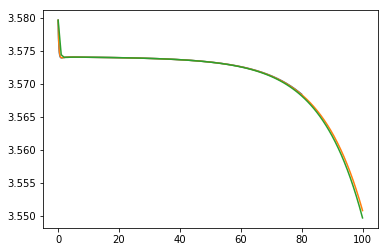

In [117]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

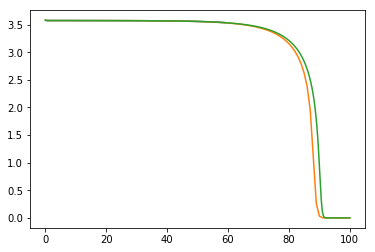

In [122]:
for uuid in ['ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

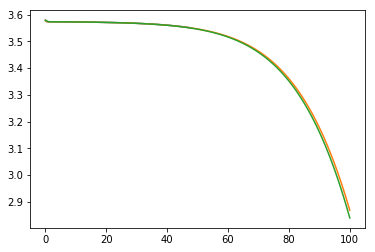

In [124]:
for uuid in ['5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

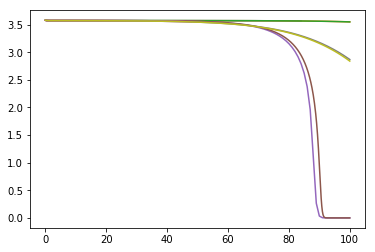

In [125]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

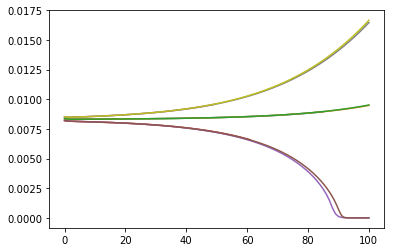

In [126]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, fraction)

In [129]:
!ls -lt Data/5b147f7a03fc

total 47020
-rw-r--r-- 1 guyer dialout 949719 Oct 16 17:16 t=50.0.tar.gz
-rw-r--r-- 1 guyer dialout 377498 Oct 16 17:16 stats.txt
-rw-r--r-- 1 guyer dialout 950482 Oct 16 17:15 t=49.0.tar.gz
-rw-r--r-- 1 guyer dialout 950439 Oct 16 17:14 t=48.0.tar.gz
-rw-r--r-- 1 guyer dialout 949766 Oct 16 17:12 t=47.0.tar.gz
-rw-r--r-- 1 guyer dialout 949801 Oct 16 17:11 t=46.0.tar.gz
-rw-r--r-- 1 guyer dialout 949731 Oct 16 17:10 t=45.0.tar.gz
-rw-r--r-- 1 guyer dialout 949274 Oct 16 17:09 t=44.0.tar.gz
-rw-r--r-- 1 guyer dialout 950429 Oct 16 17:08 t=43.0.tar.gz
-rw-r--r-- 1 guyer dialout 949111 Oct 16 17:07 t=42.0.tar.gz
-rw-r--r-- 1 guyer dialout 950288 Oct 16 17:06 t=41.0.tar.gz
-rw-r--r-- 1 guyer dialout 950754 Oct 16 17:05 t=40.0.tar.gz
-rw-r--r-- 1 guyer dialout 949666 Oct 16 17:03 t=39.0.tar.gz
-rw-r--r-- 1 guyer dialout 949179 Oct 16 17:02 t=38.0.tar.gz
-rw-r--r-- 1 guyer dialout 950384 Oct 16 17:01 t=37.0.tar.gz
-rw-r--r-- 1 guyer dialout 950945 Oct 16 17:00 t=36.0.tar.gz
-rw-r--r-- 1 guy

## Benchmark 8b

In [9]:
df[df['main_file'] == 'benchmark8b.py'][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],100.0,100.0,0.8,0.04,1.1,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],100.0,100.0,0.8,0.04,1.1,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
21,36ac86beed75,2019-10-16 17:57:12,17601.494615,[_failed_],1000.0,1000.0,0.8,0.04,1.1,Data/e97d9c91f2b4/t=116.0.tar.gz


In [136]:
print df.loc[df['label'] == 'e97d9c91f2b4']['launch_mode'].iloc[0]['parameters']['n']

64


In [10]:
!ls -lt Data/36ac86beed75

total 390092
-rw-r--r-- 1 guyer dialout    46556 Oct 16 22:51 Sumatra.36ac86beed75.json
-rw-r--r-- 1 guyer dialout       40 Oct 16 22:51 Treant.02d51a46-379d-43f7-971f-3fbe0d057d72.json
-rw-r--r-- 1 guyer dialout        0 Oct 16 22:50 t=236.0.tar.gz
-rw-r--r-- 1 guyer dialout   458926 Oct 16 22:50 stats.txt
-rw-r--r-- 1 guyer dialout  8199075 Oct 16 22:41 t=232.0.tar.gz
-rw-r--r-- 1 guyer dialout  8546762 Oct 16 22:31 t=228.0.tar.gz
-rw-r--r-- 1 guyer dialout  8917753 Oct 16 22:22 t=224.0.tar.gz
-rw-r--r-- 1 guyer dialout  9202104 Oct 16 22:12 t=220.0.tar.gz
-rw-r--r-- 1 guyer dialout  9523234 Oct 16 22:02 t=216.0.tar.gz
-rw-r--r-- 1 guyer dialout  9886555 Oct 16 21:53 t=212.0.tar.gz
-rw-r--r-- 1 guyer dialout 10232790 Oct 16 21:43 t=208.0.tar.gz
-rw-r--r-- 1 guyer dialout 10596946 Oct 16 21:34 t=204.0.tar.gz
-rw-r--r-- 1 guyer dialout 11009945 Oct 16 21:24 t=200.0.tar.gz
-rw-r--r-- 1 guyer dialout 11447809 Oct 16 21:14 t=196.0.tar.gz
-rw-r--r-- 1 guyer dialout 11864608 Oct 16 21:04 t=

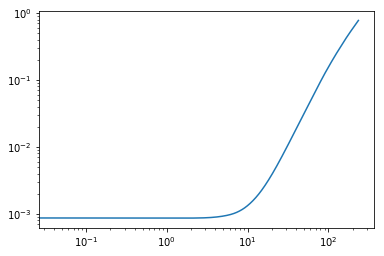

In [15]:
tt, fraction, energy = fp.numerix.loadtxt("Data/36ac86beed75/stats.txt", unpack=True)
plt.loglog(tt, -fp.tools.log10(1-fraction))

## Benchmark 8c

In [17]:
df[df['main_file'] == 'benchmark8c.py'][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
22,a8d8c8c53199,2019-10-17 17:03:28,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
23,65ac831fdaaf,2019-10-17 19:09:00,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
24,8c61a15b939e,2019-10-17 19:12:21,5438.171248,[_finished_],1000.0,1000.0,0.8,4.00,1.1,None
25,5a7ce705a1c9,2019-10-17 20:43:49,NaN,[_running_],1000.0,1000.0,0.8,0.40,1.1,None


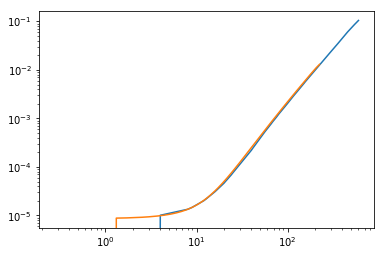

In [19]:
for uuid in ['8c61a15b939e', '5a7ce705a1c9']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{uuid}/stats.txt".format(uuid=uuid), unpack=True)
    plt.loglog(tt, -fp.tools.log10(1-fraction))

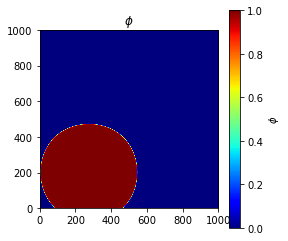

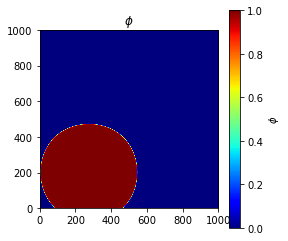

In [25]:
phi, = fp.tools.dump.read("Data/8c61a15b939e/t=600.0.tar.gz")
fp.Viewer(vars=phi).plot()

In [24]:
phi, = fp.tools.dump.read("Data/5a7ce705a1c9/t=300.0.tar.gz")
fp.Viewer(vars=phi).plot()

IOError: [Errno 2] No such file or directory: 'Data/5a7ce705a1c9/t=300.0.tar.gz'

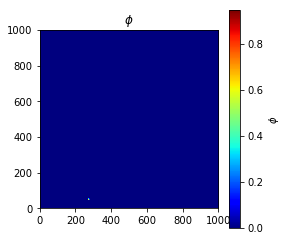

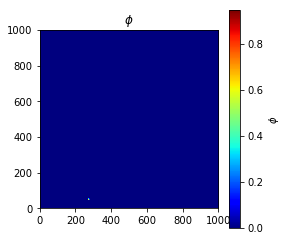

In [11]:
phi, = fp.tools.dump.read("Data/1a08233a33cc/t=10.0.tar.gz")
fp.Viewer(vars=phi).plot()

In [12]:
!ls -lt Data/1a08233a33cc

total 4128
-rw-r--r-- 1 guyer dialout   33722 Oct 18 12:24 Sumatra.1a08233a33cc.json
-rw-r--r-- 1 guyer dialout      42 Oct 18 12:24 Treant.b5323eb5-5162-45b5-bc49-7bb76b515e6e.json
-rw-r--r-- 1 guyer dialout 1622276 Oct 18 12:24 t=10.0.tar.gz
-rw-r--r-- 1 guyer dialout   19542 Oct 18 12:24 stats.txt
-rw-r--r-- 1 guyer dialout  886961 Oct 18 12:23 t=8.0.tar.gz
-rw-r--r-- 1 guyer dialout  493899 Oct 18 12:22 t=4.0.tar.gz


In [13]:
!cat Data/8c61a15b939e/nucleii.txt

# time	x	y
2.732689718970116033e-01	1.992893644507409689e-01	7.499509797403225431e-01
8.371139346500422462e+00	8.586371125020774153e-01	2.908249540557245050e-01
8.864811013351591384e+00	4.556288047320325996e-01	2.453930480363163413e-01
1.258850367249284474e+01	7.213490422876037700e-01	3.020694875765955745e-01
1.591927168351618960e+01	7.754611495863700243e-01	6.593547701437955100e-01
2.067326787066252791e+01	5.672792737286032061e-01	6.858841073465449245e-02
2.479600087243409945e+01	2.976831612336410249e-01	2.642576632080377852e-01
3.998418450196992069e+01	9.687342777056101584e-01	1.142328520635834677e-01
4.134865170128896494e+01	3.043417010558280289e-02	5.179414935779180773e-02
4.650939674511709399e+01	7.812122533458299989e-01	2.519215455664201020e-01
5.122740625877528942e+01	9.432233393630969909e-01	5.130180978431775340e-01
5.467578502654411210e+01	6.968459255573163924e-01	1.362169870671658956e-01
5.643741890208697498e+01	9.507040829712387620e-01	1.552660581928537731e-01
6.623402736537

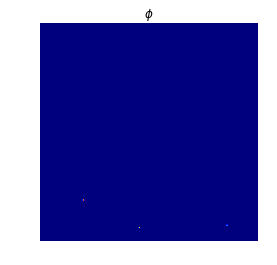

In [15]:
phi, = fp.tools.dump.read("Data/4235ab45eb3a/t=10.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.image.write_png("Data/4235ab45eb3a/t=10.0.png")

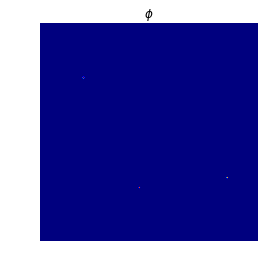

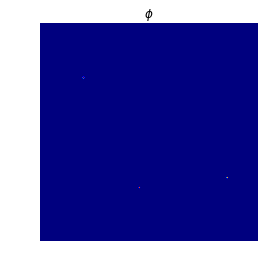

In [14]:
phi, = fp.tools.dump.read("Data/52e3d6066991/t=10.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.image.write_png("Data/52e3d6066991/t=10.0.png")
vw.plot()

In [15]:
scaling = df[(df['reason'] == "MPIscaling") & df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]
scaling

,label,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
36,c520aaa5d948,2019-10-18 16:14:58,971.150094,64,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
37,3d845875dcd6,2019-10-18 16:31:40,1074.925342,32,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
38,17e8566d9da6,2019-10-18 16:31:41,5168.995170,2,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
39,2e065ac0cf97,2019-10-18 16:31:42,8574.877326,1,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
40,694af126a4f8,2019-10-18 16:31:42,2037.635763,8,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
41,2a60d1018957,2019-10-18 16:31:42,3054.095550,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
42,feced507da09,2019-10-18 16:31:42,1405.401850,16,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz


Spending too much time checkpointing?

In [16]:
scaling2 = df[(df['reason'] == "MPIscaling2") & df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]
scaling2

,label,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
44,79d06f20e32e,2019-10-18 21:22:19,708.182221,64,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
45,c647f4215487,2019-10-18 21:34:45,4578.593929,2,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
46,26146cca1862,2019-10-18 21:34:48,2740.745837,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
47,f113793b0801,2019-10-18 21:34:46,1769.716540,8,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
48,19de55b23444,2019-10-18 21:34:49,1195.207554,16,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
49,8e5711c51ab8,2019-10-18 21:34:49,7995.469502,1,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
50,d196ac2adac3,2019-10-18 21:34:44,923.132135,32,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz


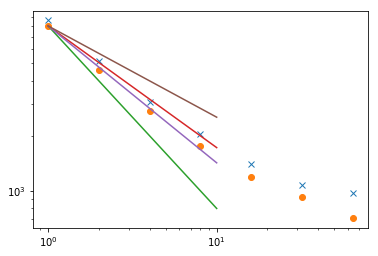

In [32]:
plt.loglog(scaling['nproc'], scaling['duration'], linestyle="", marker="x")
plt.loglog(scaling2['nproc'], scaling2['duration'], linestyle="", marker="o")
A = 8e3
dx = 10
plt.loglog([1, dx], [A, A * dx**-1])
plt.loglog([1, dx], [A, A * dx**-.6666])
plt.loglog([1, dx], [A, A * dx**-.75])
plt.loglog([1, dx], [A, A * dx**-.5])


In [10]:
!ls -lt Data/bb035c2fd44a

total 287536
-rw-r--r-- 1 guyer dialout    32607 Oct 19 16:07 Sumatra.bb035c2fd44a.json
-rw-r--r-- 1 guyer dialout       40 Oct 19 16:07 Treant.dc2658f2-e24b-4447-8ab2-275639763ddc.json
-rw-r--r-- 1 guyer dialout 12825889 Oct 19 15:59 t=128.0.tar.gz
-rw-r--r-- 1 guyer dialout   263815 Oct 19 15:59 stats.txt
-rw-r--r-- 1 guyer dialout 12680996 Oct 19 15:51 t=124.0.tar.gz
-rw-r--r-- 1 guyer dialout 12526786 Oct 19 15:45 t=120.0.tar.gz
-rw-r--r-- 1 guyer dialout 12091035 Oct 19 15:39 t=116.0.tar.gz
-rw-r--r-- 1 guyer dialout 14028620 Oct 19 15:33 t=112.0.tar.gz
-rw-r--r-- 1 guyer dialout 11848230 Oct 19 15:27 t=108.0.tar.gz
-rw-r--r-- 1 guyer dialout 11753481 Oct 19 15:22 t=104.0.tar.gz
-rw-r--r-- 1 guyer dialout 11698737 Oct 19 15:16 t=100.0.tar.gz
-rw-r--r-- 1 guyer dialout 11153937 Oct 19 15:10 t=96.0.tar.gz
-rw-r--r-- 1 guyer dialout 11059399 Oct 19 15:04 t=92.0.tar.gz
-rw-r--r-- 1 guyer dialout 10838173 Oct 19 14:59 t=88.0.tar.gz
-rw-r--r-- 1 guyer dialout 10642832 Oct 19 14:53 t=84.

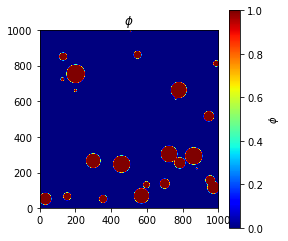

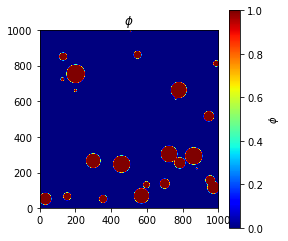

In [11]:
phi, = fp.tools.dump.read("Data/bb035c2fd44a/t=128.0.tar.gz")
vw = fp.Viewer(vars=phi)
vw.plot()

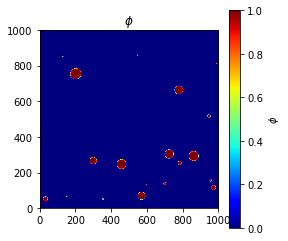

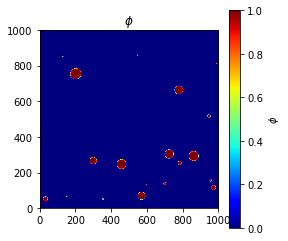

In [41]:
phi_04, = fp.tools.dump.read("Data/bb035c2fd44a/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi_04)
vw.plot()

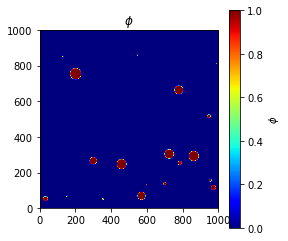

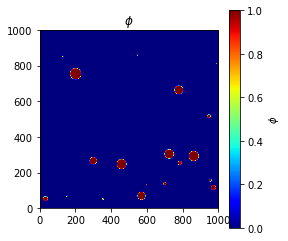

In [42]:
phi_4, = fp.tools.dump.read("Data/7d2f69a2507a/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi_4)
vw.plot()

In [28]:
!ls -lt Data/59b973325e9e

total 24792
-rw-r--r-- 1 guyer dialout    26248 Oct 19 14:39 Sumatra.59b973325e9e.json
-rw-r--r-- 1 guyer dialout       42 Oct 19 14:39 Treant.5b94a79b-d83f-48da-b40d-b3c3c05cdae4.json
-rw-r--r-- 1 guyer dialout  1655362 Oct 19 14:39 t=600.0.tar.gz
-rw-r--r-- 1 guyer dialout    34969 Oct 19 14:38 stats.txt
-rw-r--r-- 1 guyer dialout  7762982 Oct 19 14:30 t=400.0.tar.gz
-rw-r--r-- 1 guyer dialout 15880822 Oct 19 14:17 t=80.0.tar.gz
-rw-r--r-- 1 guyer dialout     7511 Oct 19 14:13 nucleii.txt


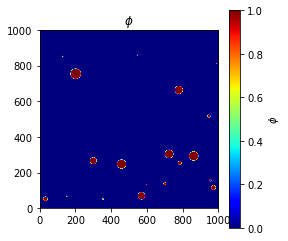

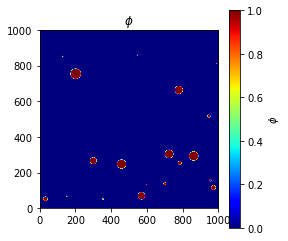

In [43]:
phi4, = fp.tools.dump.read("Data/59b973325e9e/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi4)
vw.plot()

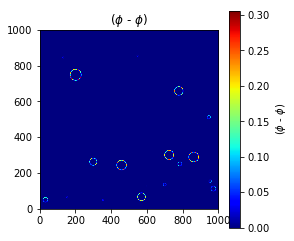

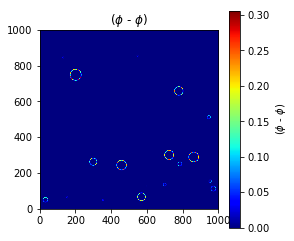

In [44]:
vw = fp.Viewer(vars=phi_4 - phi_04)
vw.plot()

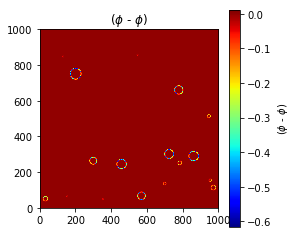

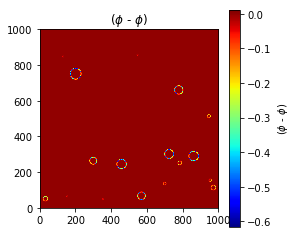

In [45]:
vw = fp.Viewer(vars=phi4 - phi_4)
vw.plot()

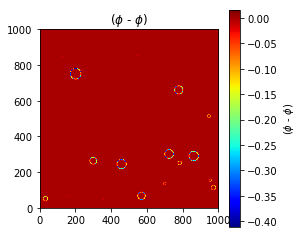

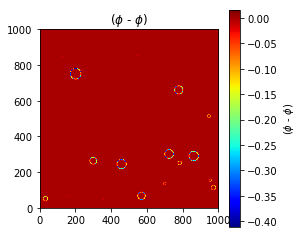

In [46]:
vw = fp.Viewer(vars=phi4 - phi_04)
vw.plot()

In [34]:
!ls -lt Data/bb035c2fd44a

total 287536
-rw-r--r-- 1 guyer dialout    32607 Oct 19 16:07 Sumatra.bb035c2fd44a.json
-rw-r--r-- 1 guyer dialout       40 Oct 19 16:07 Treant.dc2658f2-e24b-4447-8ab2-275639763ddc.json
-rw-r--r-- 1 guyer dialout 12825889 Oct 19 15:59 t=128.0.tar.gz
-rw-r--r-- 1 guyer dialout   263815 Oct 19 15:59 stats.txt
-rw-r--r-- 1 guyer dialout 12680996 Oct 19 15:51 t=124.0.tar.gz
-rw-r--r-- 1 guyer dialout 12526786 Oct 19 15:45 t=120.0.tar.gz
-rw-r--r-- 1 guyer dialout 12091035 Oct 19 15:39 t=116.0.tar.gz
-rw-r--r-- 1 guyer dialout 14028620 Oct 19 15:33 t=112.0.tar.gz
-rw-r--r-- 1 guyer dialout 11848230 Oct 19 15:27 t=108.0.tar.gz
-rw-r--r-- 1 guyer dialout 11753481 Oct 19 15:22 t=104.0.tar.gz
-rw-r--r-- 1 guyer dialout 11698737 Oct 19 15:16 t=100.0.tar.gz
-rw-r--r-- 1 guyer dialout 11153937 Oct 19 15:10 t=96.0.tar.gz
-rw-r--r-- 1 guyer dialout 11059399 Oct 19 15:04 t=92.0.tar.gz
-rw-r--r-- 1 guyer dialout 10838173 Oct 19 14:59 t=88.0.tar.gz
-rw-r--r-- 1 guyer dialout 10642832 Oct 19 14:53 t=84.

In [9]:
!ls -lt Data/97f1b977d088

total 507884
-rw-r--r-- 1 guyer dialout    32651 Oct 20 01:23 Sumatra.97f1b977d088.json
-rw-r--r-- 1 guyer dialout       40 Oct 20 01:23 Treant.dde9411b-3d1b-4ce1-b97b-9cd6733e8698.json
-rw-r--r-- 1 guyer dialout 16563550 Oct 20 01:17 t=256.0.tar.gz
-rw-r--r-- 1 guyer dialout   509751 Oct 20 01:17 stats.txt
-rw-r--r-- 1 guyer dialout 16684772 Oct 20 01:11 t=252.0.tar.gz
-rw-r--r-- 1 guyer dialout 16462869 Oct 20 01:05 t=248.0.tar.gz
-rw-r--r-- 1 guyer dialout 17838517 Oct 20 01:00 t=244.0.tar.gz
-rw-r--r-- 1 guyer dialout 16518719 Oct 20 00:54 t=240.0.tar.gz
-rw-r--r-- 1 guyer dialout 16864781 Oct 20 00:48 t=236.0.tar.gz
-rw-r--r-- 1 guyer dialout 16827451 Oct 20 00:42 t=232.0.tar.gz
-rw-r--r-- 1 guyer dialout 17444411 Oct 20 00:36 t=228.0.tar.gz
-rw-r--r-- 1 guyer dialout 16753386 Oct 20 00:31 t=224.0.tar.gz
-rw-r--r-- 1 guyer dialout 16787838 Oct 20 00:25 t=220.0.tar.gz
-rw-r--r-- 1 guyer dialout 16792240 Oct 20 00:19 t=216.0.tar.gz
-rw-r--r-- 1 guyer dialout 16820498 Oct 20 00:13 t=

In [9]:
ls -lt Data/47a4da235c23

total 395192
-rw-r--r-- 1 guyer dialout    32843 Oct 21 01:14 Sumatra.47a4da235c23.json
-rw-r--r-- 1 guyer dialout       40 Oct 21 01:14 Treant.596bb60e-cbee-4e1e-8c7e-4b2a558675e3.json
-rw-r--r-- 1 guyer dialout  6675608 Oct 21 01:07 t=384.0.tar.gz
-rw-r--r-- 1 guyer dialout   735249 Oct 21 01:07 stats.txt
-rw-r--r-- 1 guyer dialout  6992494 Oct 21 01:01 t=380.0.tar.gz
-rw-r--r-- 1 guyer dialout  7341576 Oct 21 00:56 t=376.0.tar.gz
-rw-r--r-- 1 guyer dialout  7666046 Oct 21 00:50 t=372.0.tar.gz
-rw-r--r-- 1 guyer dialout  8287729 Oct 21 00:45 t=368.0.tar.gz
-rw-r--r-- 1 guyer dialout  8319823 Oct 21 00:39 t=364.0.tar.gz
-rw-r--r-- 1 guyer dialout  8659520 Oct 21 00:33 t=360.0.tar.gz
-rw-r--r-- 1 guyer dialout  9110137 Oct 21 00:28 t=356.0.tar.gz
-rw-r--r-- 1 guyer dialout  9383023 Oct 21 00:22 t=352.0.tar.gz
-rw-r--r-- 1 guyer dialout  9753231 Oct 21 00:16 t=348.0.tar.gz
-rw-r--r-- 1 guyer dialout 10418814 Oct 21 00:11 t=344.0.tar.gz
-rw-r--r-- 1 guyer dialout 10548394 Oct 21 00:05 t=

In [23]:
!ls -lt Data/b71bc7590077

total 108432
-rw-r--r-- 1 guyer dialout 1106301 Oct 21 12:11 t=512.0.tar.gz
-rw-r--r-- 1 guyer dialout  979969 Oct 21 12:11 stats.txt
-rw-r--r-- 1 guyer dialout 1190274 Oct 21 12:06 t=508.0.tar.gz
-rw-r--r-- 1 guyer dialout 1288903 Oct 21 12:00 t=504.0.tar.gz
-rw-r--r-- 1 guyer dialout 1379000 Oct 21 11:55 t=500.0.tar.gz
-rw-r--r-- 1 guyer dialout 1507319 Oct 21 11:49 t=496.0.tar.gz
-rw-r--r-- 1 guyer dialout 1622928 Oct 21 11:43 t=492.0.tar.gz
-rw-r--r-- 1 guyer dialout 1743196 Oct 21 11:36 t=488.0.tar.gz
-rw-r--r-- 1 guyer dialout 1883622 Oct 21 11:31 t=484.0.tar.gz
-rw-r--r-- 1 guyer dialout 1990402 Oct 21 11:25 t=480.0.tar.gz
-rw-r--r-- 1 guyer dialout 2122423 Oct 21 11:19 t=476.0.tar.gz
-rw-r--r-- 1 guyer dialout 2275036 Oct 21 11:13 t=472.0.tar.gz
-rw-r--r-- 1 guyer dialout 2403069 Oct 21 11:08 t=468.0.tar.gz
-rw-r--r-- 1 guyer dialout 2555451 Oct 21 11:02 t=464.0.tar.gz
-rw-r--r-- 1 guyer dialout 2710688 Oct 21 10:57 t=460.0.tar.gz
-rw-r--r-- 1 guyer dialout 2856203 Oct 21 10:51

In [28]:
!ls -lt Data/5b4447b81e13

total 7192
-rw-r--r-- 1 guyer dialout  749581 Oct 21 16:22 t=536.0.tar.gz
-rw-r--r-- 1 guyer dialout 1026177 Oct 21 16:22 stats.txt
-rw-r--r-- 1 guyer dialout  795824 Oct 21 16:17 t=532.0.tar.gz
-rw-r--r-- 1 guyer dialout  832492 Oct 21 16:11 t=528.0.tar.gz
-rw-r--r-- 1 guyer dialout  872391 Oct 21 16:06 t=524.0.tar.gz
-rw-r--r-- 1 guyer dialout  927831 Oct 21 16:00 t=520.0.tar.gz
-rw-r--r-- 1 guyer dialout 1002338 Oct 21 15:55 t=516.0.tar.gz
-rw-r--r-- 1 guyer dialout    7511 Oct 21 15:49 nucleii.txt
-rw-r--r-- 1 guyer dialout 1106301 Oct 21 15:49 t=512.0.tar.gz
-rw-r--r-- 1 guyer dialout   16535 Oct 21 15:46 Sumatra.5b4447b81e13.json
-rw-r--r-- 1 guyer dialout      41 Oct 21 15:46 Treant.02d6e580-b267-4ca6-a0c0-0b882bf8be55.json


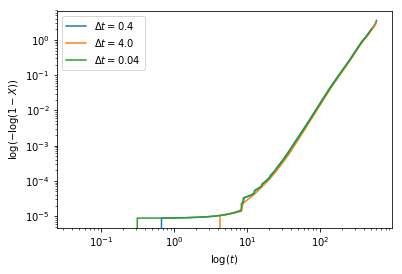

In [16]:
def plot_avrami(record):
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(record["label"]), unpack=True)
    plt.loglog(tt, -fp.tools.log10(1-fraction), 
               label="$\Delta t = {}$".format(record["--dt"]))
    
df[df.label.apply(lambda x: x in ["59b973325e9e", "7d2f69a2507a", "b71bc7590077"])].apply(plot_avrami, axis=1)
plt.ylabel("$\log(-\log(1-X))$")
plt.xlabel("$\log(t)$")
plt.legend(loc="upper left")

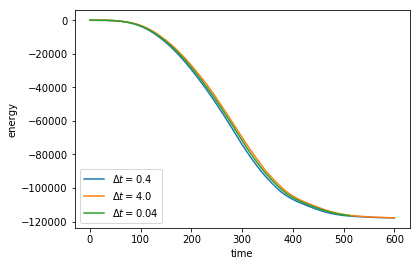

In [17]:
def plot_energy(record):
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(record["label"]), unpack=True)
    plt.plot(tt, energy, 
               label="$\Delta t = {}$".format(record["--dt"]))
    
df[df.label.apply(lambda x: x in ["59b973325e9e", "7d2f69a2507a", "b71bc7590077"])].apply(plot_energy, axis=1)
plt.ylabel("energy")
plt.xlabel("time")
plt.legend(loc="lower left")